In [6]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from sklearn.metrics import r2_score

In [7]:
df = pd.read_pickle('Covid_meta_nl.pkl')
df2 = pd.read_pickle('Covid_counts_nl.pkl')

In [20]:
#uso=df2[df2.Count>1450]
uso1=df2[df2.Count>252]
uso=uso1[uso1.Count<254]
uso.head()
#A coluna chama-se 'Tweet' nos dois ficheiros

,Text,Count,Tweet
2492200,"Je hoort niks meer over hypoheekrenteaftrek, d...",253,3292457
24199,#COVID2019NL\nRutte kan het dan wel mooi een i...,253,3292458
2311205,Het is toch ongelooflijk dat ook gisteren vrij...,253,3292459
2890433,Studenten zitten al bijna een jaar achter hun ...,253,3292460
2305515,Het is ONGEKEND! In minder dan drie dagen (!) ...,253,3292461


In [9]:
counts = uso['Count'].to_numpy()
print(counts)

[335 335 335 335 335]


In [10]:
tweet_id = uso['Tweet'].to_numpy()
N=len(tweet_id)
print(tweet_id, N)

[3292920 3292921 3292922 3292923 3292924] 5


In [11]:
def FitMod(x, C, a, g, d):
    y = C/(np.exp(-1*a*np.exp(-1*(g*(x-d)))))
    return y

/tmp/ipykernel_602926/1668178551.py:2: RuntimeWarning: overflow encountered in exp
  y = C/(np.exp(-1*a*np.exp(-1*(g*(x-d)))))
/tmp/ipykernel_602926/1668178551.py:2: RuntimeWarning: overflow encountered in exp
  y = C/(np.exp(-1*a*np.exp(-1*(g*(x-d)))))
/tmp/ipykernel_602926/1668178551.py:2: RuntimeWarning: overflow encountered in exp
  y = C/(np.exp(-1*a*np.exp(-1*(g*(x-d)))))
/tmp/ipykernel_602926/1668178551.py:2: RuntimeWarning: overflow encountered in exp
  y = C/(np.exp(-1*a*np.exp(-1*(g*(x-d)))))
/tmp/ipykernel_602926/1668178551.py:2: RuntimeWarning: divide by zero encountered in true_divide
  y = C/(np.exp(-1*a*np.exp(-1*(g*(x-d)))))
/tmp/ipykernel_602926/1668178551.py:2: RuntimeWarning: overflow encountered in true_divide
  y = C/(np.exp(-1*a*np.exp(-1*(g*(x-d)))))
/tmp/ipykernel_602926/1668178551.py:2: RuntimeWarning: overflow encountered in exp
  y = C/(np.exp(-1*a*np.exp(-1*(g*(x-d)))))
/tmp/ipykernel_602926/1668178551.py:2: RuntimeWarning: overflow encountered in multiply
 

0.9866029227671504
0.9870320073556286
0.9926493864095851
0.9804812117304242
0.9938512378034994


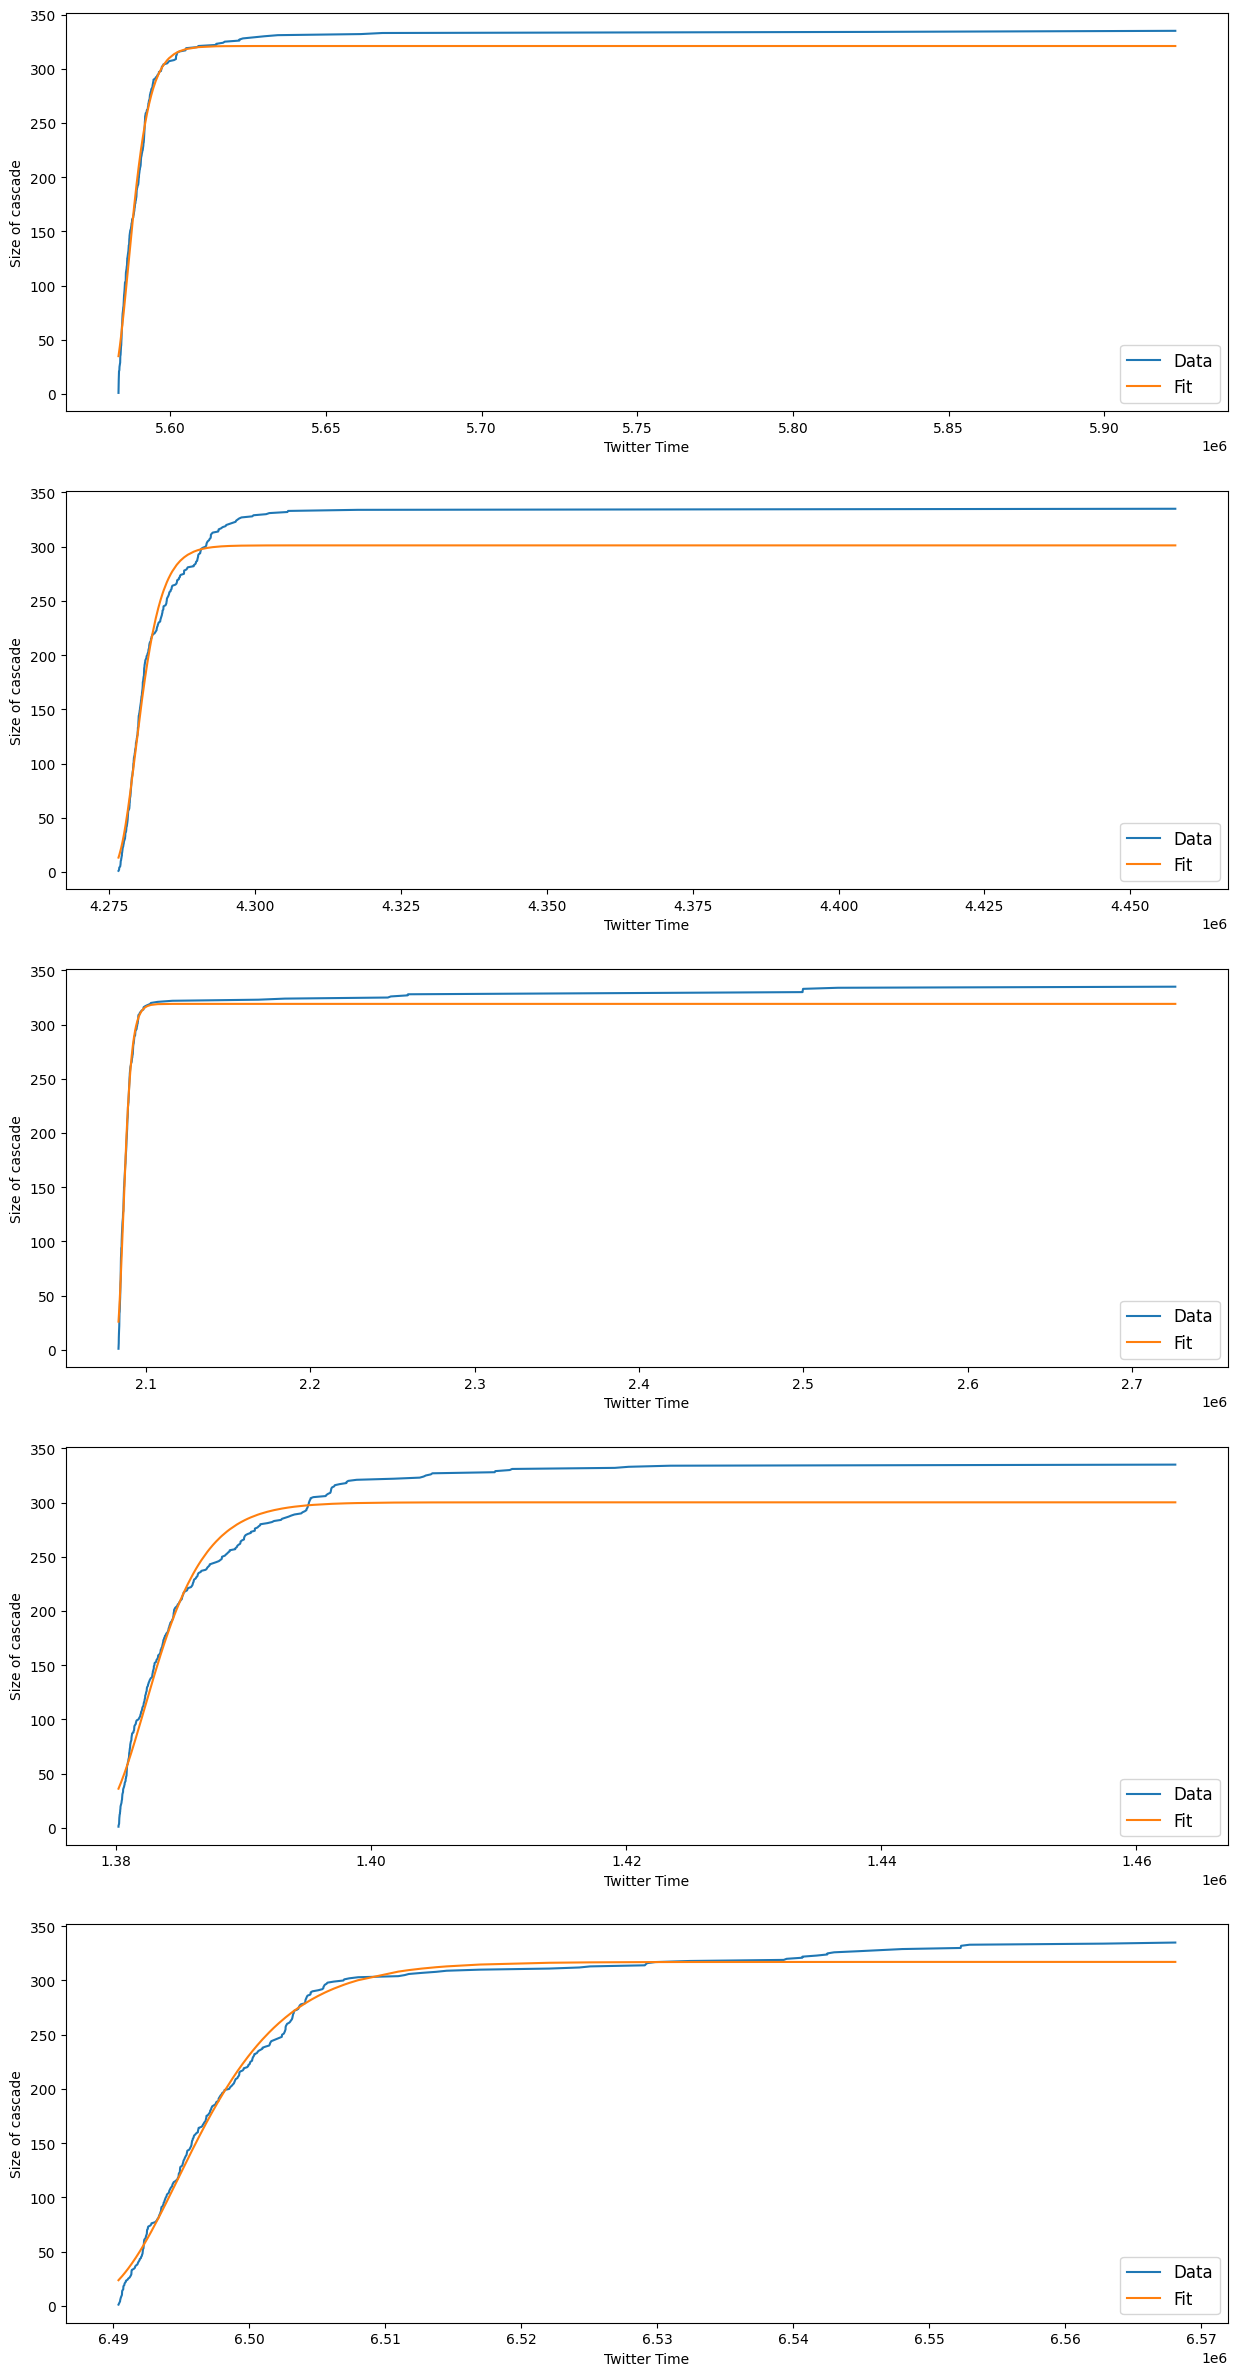

In [21]:
fig, ax = plt.subplots(nrows= N, ncols=1, figsize=(15, N*6))

for i in range(0, N, 1):
    df_cas = df[df.Tweet==tweet_id[i]]
    
    time = df_cas['Time']
    size = np.arange(counts[i])+1
    
    xdata = np.asarray(time)
    ydata = np.asarray(size)
    
    w = len(xdata)//5
    shift = xdata[w]
    
    guess=[counts[i],-15,0.005,shift]
    
    parameters, covariance = curve_fit(FitMod, xdata, ydata, guess)
    
    fit_C = parameters[0]
    fit_a = parameters[1]
    fit_g = parameters[2]
    fit_shift = parameters[3]

    fit_y = FitMod(xdata, fit_C, fit_a, fit_g, fit_shift)
    r=r2_score(ydata, fit_y)
    print(r)
    
   
    
    #plt.plot(xdata, ydata, 'o', label='data')
    #plt.plot(xdata, fit_y, '-', label='fit')
    #plt.legend()

    ax[i].plot(xdata, ydata, label='Data')
    ax[i].plot(xdata, fit_y, label='Fit')
    ax[i].legend(loc = 'lower right', fontsize = 'large')
    ax[i].set_ylabel("Size of cascade")
    ax[i].set_xlabel("Twitter Time")
    

plt.show()
